In [30]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import datetime
import pandas as pd
import numpy as np
from torch.autograd import Variable
import matplotlib as plt

# Load in Cody's CSV

In [32]:
url = "~/Dropbox/RandomBergman/KS4/data.csv"


print 'begin loading csv', datetime.datetime.now()
names=['Ginf','Go','share2cone','Vinf','Vo','Vrat','Graphd','weirdrat','weridrat2','Arat','V','Ainfinf','Ainfother',
       'Angles','Crat']
names = ['name' + str(ii) for ii in range(36)]
#snames = range(15)
dataset = pd.read_csv(url, names = names)
#data2 = dataset
print 'end loading csv', datetime.datetime.now()

print dataset[0:1]

from sklearn.utils import shuffle
dataset = shuffle(dataset)
shuffled = True
dataset.reset_index(inplace=True, drop=True)


#bigs = [3,4,5,7,8,9,10,11,12,13,14]
#bigs = [names[big] for big in bigs]
#for big in bigs:
#    dataset['log'+str(big)] = np.log10(np.abs(dataset[big]))

truncate_size = len(dataset)
#truncate_size = 200000
dataset = dataset[0:truncate_size]

print len(dataset)
print(dataset.shape)
print(dataset[0:10])
# print(dataset.head(20))
# print(dataset.describe())
# set([type(k) for k in dataset['logCrat']]) # check types
#set([type(k) for k in dataset['logBig14']]) # check types

begin loading csv 2019-06-20 13:35:46.443275
end loading csv 2019-06-20 13:35:46.517028
   name0  name1  name2  name3  name4     name5     name6     name7     name8  \
0      0      2     13      2      0  0.000075  0.000674  0.001422  0.002021   

      name9   ...      name26   name27    name28    name29    name30  \
0  0.003031   ...    0.360914  0.38552  0.455395  0.465176  0.472343   

     name31    name32    name33   name34  name35  
0  0.478612  0.510768  0.772257  0.92073       0  

[1 rows x 36 columns]
4220
(4220, 36)
   name0  name1  name2  name3  name4     name5     name6     name7     name8  \
0      0      3     16      3      0  0.000180  0.000180  0.000180  0.000719   
1      1      4     11      4      1  0.000465  0.002403  0.003256  0.003411   
2      2      3     14      3      2  0.000023  0.000070  0.000094  0.000141   
3      3      7     14      7      3  0.000090  0.000090  0.000120  0.000180   
4      2      6     12      6      2  0.000007  0.000028  0.00002

# Setup PyTorch Dataset

Cody's CSV was read into a Pandas DataFrame. We want to put it into a PyTorch DataSet, now.

Following [this website](https://www.kaggle.com/pinocookie/pytorch-dataset-and-dataloader) with some minor changes, below we will create a class DatasetFromDataframe that, with a reasonable degree of generality, maps a Pandas DataFrame into a PyTorch Dataset. This should be extremely useful in the future.

In [134]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [135]:
class DatasetFromDataframe(Dataset):
    def __init__(self,df,transform=None):
        self.data = df
        self.transform = transform
    
    def __len__(self): return len(self.data)
    
    def __getitem__(self,index):
        input = self.data.iloc[index,:-1].values.astype(np.float32).reshape((-1, len(self.data.columns)-1))
        output = self.data.iloc[index,-1].astype(np.float32).reshape((1))
        
        if self.transform is not None:
            input = self.transform(input)
            
        return input, output
        

In [136]:
# Setup train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.1)
print type(train), type(test) # check types

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


All looks good to go, let's do some machine learning.

In [137]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim, num_hidden = 5):
        super(FeedforwardNeuralNetModel,self).__init__()
        
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        self.hiddens = [nn.Linear(hidden_dim,hidden_dim) for i in range(num_hidden)]
        for hidden in self.hiddens:
            if torch.cuda.is_available(): hidden.cuda()
        self.fc3 = nn.Linear(hidden_dim,output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        for hidden in self.hiddens:
            out = hidden(out)
            out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

In [138]:
print torch.cuda.is_available()

False


In [139]:
train_dataset = DatasetFromDataframe(train)
test_dataset = DatasetFromDataframe(test)
train_loader = DataLoader(train_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
test_loader = DataLoader(test_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
for images, labels in test_loader:
    print labels

tensor([[0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [155]:
def predict_log10crat(train_dataset,test_dataset, train_loader, test_loader,num_epochs):
    train_dataset = DatasetFromDataframe(train)
    test_dataset = DatasetFromDataframe(test)
    train_loader = DataLoader(train_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
    test_loader = DataLoader(test_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()

    input_dim = len(train_dataset.data.columns) - 1
    hidden_dim = 100
    output_dim = 1

    model = FeedforwardNeuralNetModel(input_dim,hidden_dim,output_dim)
    if torch.cuda.is_available():
        print 'cuda'
        model = model.cuda()

    criterion = nn.MSELoss()
    learning_rate = 0.01
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    import datetime

    totinfos, totmses = [], []

    it = 0
    for epoch in range(num_epochs):
        if epoch % 1 == 0: print "EPOCH", epoch
        if epoch % 1 == 0: 

            info = []
            mses = []
            for images, labels in test_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1,input_dim).cuda())
                else: 
                    images = Variable(images.view(-1,input_dim))
                outputs = model(images)
                #print outputs[0], labels[0]
                #print 'train', outputs[0]
                info.append(abs(float(torch.mean((outputs.cpu() - labels)/labels * 100))))
                mses.append(float(nn.functional.mse_loss(outputs.cpu(),labels)))
            
            correct = 0
            total = 0
            with torch.no_grad():
                for data in test_loader:
                    images, labels = data
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted.float() == labels.float()).sum().item()

            print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

            print datetime.datetime.now()
            print it, epoch, datetime.datetime.now(), np.mean(info), np.mean(mses)
            totinfos.append(np.mean(info))
            totmses.append(np.mean(mses))    
        for i, (images,labels) in enumerate(train_loader):

            if torch.cuda.is_available():
                images = Variable(images.view(-1,input_dim).cuda())
                labels = Variable(labels.cuda())
            else:
                images = Variable(images.view(-1,input_dim))
                labels = Variable(labels)

            #print 'image length', len(images)

            optimizer.zero_grad()

            outputs = model(images)
            #print 'train', outputs[0]

            loss = criterion(outputs,labels)

            loss.backward()

            optimizer.step()

            it += 1
    return model


In [156]:
# Setup train test split
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(dataset, test_size=0.1)
#train_dataset = DatasetFromDataframe(train)
#test_dataset = DatasetFromDataframe(test)
#train_loader = DataLoader(train_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
#test_loader = DataLoader(test_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
#predict_log10crat(train_dataset,test_dataset, train_loader, test_loader,10)

In [157]:
newnames = [d for d in dataset]
print newnames

['name0', 'name1', 'name2', 'name3', 'name4', 'name5', 'name6', 'name7', 'name8', 'name9', 'name10', 'name11', 'name12', 'name13', 'name14', 'name15', 'name16', 'name17', 'name18', 'name19', 'name20', 'name21', 'name22', 'name23', 'name24', 'name25', 'name26', 'name27', 'name28', 'name29', 'name30', 'name31', 'name32', 'name33', 'name34', 'name35']


In [158]:
# Setup train test split
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(dataset.drop(columns=['Ginf', 'Go', 'Graphd', 'Arat', 'Ainfinf', 'Ainfother', 'logVo', 'logweirdrat', 'logweridrat2', 'logV', 'logAngles', 'logCrat']), test_size=0.1)
#train_dataset = DatasetFromDataframe(train)
#test_dataset = DatasetFromDataframe(test)
#train_loader = DataLoader(train_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
#test_loader = DataLoader(test_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
#predict_log10crat(train_dataset,test_dataset, train_loader, test_loader,10)

In [159]:
# Setup train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.1)
train_dataset = DatasetFromDataframe(train)
test_dataset = DatasetFromDataframe(test)
train_loader = DataLoader(train_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
test_loader = DataLoader(test_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
nn1 = predict_log10crat(train_dataset,test_dataset, train_loader, test_loader,10)

EPOCH 0
Accuracy of the network on the 10000 test images: 39 %
2019-06-20 15:57:17.242326
0 0 2019-06-20 15:57:17.242412 inf 0.2440460979938507
EPOCH 1
Accuracy of the network on the 10000 test images: 39 %
2019-06-20 15:57:19.402602
38 1 2019-06-20 15:57:19.402686 inf 0.2431366264820099
EPOCH 2
Accuracy of the network on the 10000 test images: 39 %
2019-06-20 15:57:21.317389
76 2 2019-06-20 15:57:21.317490 inf 0.23629097044467925
EPOCH 3
Accuracy of the network on the 10000 test images: 39 %
2019-06-20 15:57:23.324084
114 3 2019-06-20 15:57:23.324170 inf 0.23959160447120667
EPOCH 4
Accuracy of the network on the 10000 test images: 39 %
2019-06-20 15:57:25.633064
152 4 2019-06-20 15:57:25.633149 inf 0.23932820558547974
EPOCH 5
Accuracy of the network on the 10000 test images: 39 %
2019-06-20 15:57:27.497344
190 5 2019-06-20 15:57:27.497488 inf 0.24235759377479554
EPOCH 6
Accuracy of the network on the 10000 test images: 39 %
2019-06-20 15:57:29.524725
228 6 2019-06-20 15:57:29.524860 i

In [ ]:
ds1 = dataset.drop(columns=['logAinfother','logAinfinf','logArat','Ginf',
                            'Go','logweirdrat','logweridrat2','logAngles'])
ds1new = ds1.values.tolist()
#print ds1[0:1]
params= list(nn1.parameters())
print(len(params))
print ds1[0:1]
#print(params[0].size())
#print torch.randn(1, 1, 32, 32)
print ds1new[0]
tot = 0
for ii in range(len(ds1new)):
    pval =  nn1(torch.Tensor([ds1new[ii][p] for p in range(0,6)]))[0].item()
    actual  = abs(ds1new[ii][6])
    if actual >1e-1:
        tot += abs((abs(pval)-abs(actual))/(abs(actual) + abs(pval))*2)
mape = tot/len(ds1new)
print mape*100


In [ ]:
# Setup train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset.drop(columns=['Ginf','Go', 'share2cone', 'Graphd' ,'logVinf', 'logVo', 'logVrat',
                                                     'logweirdrat', 'logweridrat2', 'logV', 'logAngles']), test_size=0.1)
train_dataset = DatasetFromDataframe(train)
test_dataset = DatasetFromDataframe(test)
train_loader = DataLoader(train_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
test_loader = DataLoader(test_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
nn2 = predict_log10crat(train_dataset,test_dataset, train_loader, test_loader,10)



In [ ]:
params= list(nn2.parameters())
print(len(params))

In [215]:
ds2 = dataset.drop(columns=['Ginf','Go', 'share2cone', 'Graphd', 'logVinf', 'logVo', 
                            'logVrat', 'logweirdrat', 'logweridrat2', 'logV', 'logAngles'])
ds2new = ds2.values.tolist()
#print ds1[0:1]
params= list(nn2.parameters())
print(len(params))
print ds2[0:100]
#print(params[0].size())
#print torch.randn(1, 1, 32, 32)
print ds2new[0]
tot = 0
actuals = []
for ii in range(len(ds2new)):
    pval =  nn2(torch.Tensor([ds2new[ii][p] for p in range(0,3)]))[0].item()
    actual  = abs(ds2new[ii][3])
    
    if actual > 1e-100000:
        tot += abs((abs(pval)-abs(actual))/((abs(actual) + abs(pval))/2))
        actuals.append(abs(actual))
mape = tot/len(ds2new)
print mape*100


4
     logArat    logAinfinf  logAinfother   logCrat
0  -0.888814 -2.950483e+00     -3.839297 -0.888815
1  -1.196295 -8.813615e-02     -1.284431 -1.196295
2  -2.438543  2.761142e-07     -2.438543 -2.438543
3  -2.256127 -6.661971e+00     -8.918098 -2.309227
4  -0.714905 -4.755820e+00     -5.470724 -0.714917
5   2.394633 -8.625106e+00     -6.230472  2.392370
6   0.710803 -3.345980e+00     -2.635176  0.710803
7  -1.544740 -2.508312e+00     -4.053052 -1.544740
8  -0.698978 -8.813609e-02     -0.787114 -0.698978
9   0.865633 -6.002079e+00     -5.136445  0.865633
10 -0.357935 -9.150664e-01     -1.273001 -0.357935
11  0.999580 -3.418302e+00     -2.418722  0.999580
12 -1.743721 -6.684531e+00     -8.428252 -1.750306
13 -1.880814  1.204120e+00     -0.676694 -1.880814
14 -1.367718 -3.297651e+00     -4.665369 -1.367718
15 -5.288534  9.030900e-01     -4.385444 -5.288535
16 -0.684129 -1.080106e+01    -11.485189 -0.830546
17 -1.340809 -7.775441e+00     -9.116251 -1.349924
18 -0.052388 -1.237647e+00   

In [216]:
print pval
print actual
[ds2new[1][p] for p in range(0,3)]

3.16485857964
3.46449930134


[-1.1962946155593734, -0.08813614786594898, -1.284430763425323]

In [218]:
print actuals.index(min(actuals))
dataset[2654:2655]

2654


,Ginf,Go,share2cone,Graphd,logVinf,logVo,logVrat,logweirdrat,logweridrat2,logArat,logV,logAinfinf,logAinfother,logAngles,logCrat
2654,G2,S2,True,1,1.380211,3.106315e-07,1.380211,-9.730821,-9.730821,-3.192357e-07,11.111032,-1.380211,-1.380212,-1.039591,-3.193971e-07


In [196]:
dd = [np.log10(1/(np.abs(data2['Ainfother'][ii]))/np.abs(data2['V'][ii])) for ii in range(len(data2))]

In [25]:
import matplotlib
from matplotlib import pyplot

In [21]:
import pandas as pandas
from collections import Counter
pyplot.rc('text', usetex=True)
pyplot.rc('font', family='serif')
pyplot.tick_params(labelsize=15)
pyplot.gcf().subplots_adjust(bottom=0.20)
pyplot.hist(onedat,color = 'C0')
pyplot.xlabel(r'$R^{\alpha}_{\check{\alpha}}$',fontsize = 20)
pyplot.ylabel(r'Frequency',fontsize = 20)

NameError: name 'pyplot' is not defined

In [24]:
pyplot.hist(dd)

NameError: name 'dd' is not defined

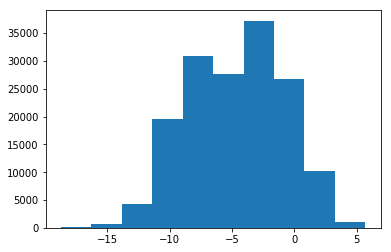

In [199]:

pyplot.show()

In [22]:
curvevols =  [np.log10((np.abs(data2['Ainfother'][ii]))*np.abs(data2['Vinf'][ii])*np.abs(data2['Vo'][ii])) for ii in range(len(data2))]

In [23]:
curvevolratios =  [np.log10((np.abs(data2['Ainfother'][ii]))*np.abs(data2['Vinf'][ii])*np.abs(data2['Vo'][ii])/((np.abs(data2['Ainfinf'][ii]))*np.abs(data2['Vinf'][ii])*np.abs(data2['Vinf'][ii]))) for ii in range(len(data2))]

In [26]:
pyplot.rc('text', usetex=True)
pyplot.rc('font', family='serif')
pyplot.tick_params(labelsize=20)
pyplot.gcf().subplots_adjust(bottom=0.20)
pyplot.hist(curvevolratios,log = True,color = 'C0')
pyplot.xlabel(r'log10$(A^{\check{\alpha}\alpha}/|A^{\check{\alpha}\check{\alpha}}|)$',fontsize = 20)
pyplot.ylabel(r'Frequency',fontsize = 20)

Text(0,0.5,'Frequency')

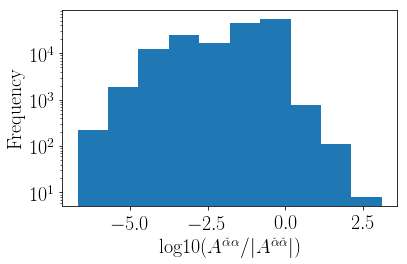

In [27]:
pyplot.show()

In [97]:
pyplot.savefig('/Users/cody/Dropbox/axionmixing/Draft/volratios.pdf')

In [ ]:
#sanity: are theses x's or A's?
curvevolratios =  [np.log10((np.abs(data2['Ainfother'][ii]))*np.abs(data2['Vinf'][ii])*np.abs(data2['Vo'][ii])/((np.abs(data2['Ainfinf'][ii]))*np.abs(data2['Vinf'][ii])*np.abs(data2['Vinf'][ii]))) for ii in range(len(data2))]

In [26]:
newdat = [-(1/2), 3/2, -3, -1, 1, 0, 2, -(3/2), -(1/2), -1, -(3/2), 0, -(1/2), 
-2, 1/2, -(1/2), 1/2, 3/2, 5/2, 1, -1, 3/2, -(1/2), -(3/2), 0, 1, 0, 
-2, 1/2, 2, 1, -(5/2), 3, 1/2, 1/2, -(3/4), 1/4, 1/2, 1/2, -(1/2), 
1/2, 1/2, 1/4, 1/4, 0, 1/4, -(1/2), -(1/4), 1/2, -(1/4), -(1/4), 
-(1/4), 1/4, 1/4, 1/2, -(1/2), -(1/4), 1/4, -(1/4), -(1/2), 0, 0, 0, 
1/4, 0, 0, 1/4, 1/2, 1/4, -(3/4), 1/4, 5/4, 3/2, 3/2, 1/2, 3/2, 3/2, 
1/4, 1/4, 1, 5/4, 1/2, 3/4, 3/2, -(1/4), -(1/4), 3/4, 1/4, 5/4, 3/2, 
1/2, 3/4, 5/4, 3/4, -(1/2), 1, 1, 1, 5/4, 1, 0, 5/4, 3/2, 1/4, 1/4]
pyplot.rc('text', usetex=True)
pyplot.rc('font', family='serif')
pyplot.tick_params(labelsize=15)
pyplot.gcf().subplots_adjust(bottom=0.20)
pyplot.hist(newdat,color = 'C0')
pyplot.xlabel(r'$a^{A,B,C}_i$',fontsize = 20)
pyplot.ylabel(r'Frequency',fontsize = 20)

Text(0,0.5,'Frequency')

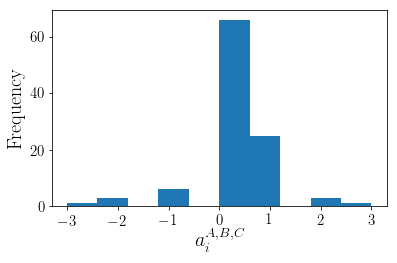

In [27]:
pyplot.show()

In [28]:
len(curvevolratios)

NameError: name 'curvevolratios' is not defined

In [136]:
# Setup train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset.drop(columns=['Ginf', 'Go', 'share2cone', 'Graphd', 'logweirdrat', 'logweridrat2', 'logArat', 'logAinfinf', 'logAinfother', 'logAngles', 'logCrat']), test_size=0.1)
train_dataset = DatasetFromDataframe(train)
test_dataset = DatasetFromDataframe(test)
train_loader = DataLoader(train_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
test_loader = DataLoader(test_dataset, batch_size = 100, shuffle = True) # sets up a train loader to test next()
predict_log10crat(train_dataset,test_dataset, train_loader, test_loader,10)

EPOCH 0
2018-11-20 14:58:18.117504
0 0 2018-11-20 14:58:18.117710 85792280371.2 4.1932056863726056e+21
EPOCH 1
2018-11-20 14:58:23.875567
180 1 2018-11-20 14:58:23.875771 85926805708.8 4.2066663228954305e+21
EPOCH 2
2018-11-20 14:58:29.671036
360 2 2018-11-20 14:58:29.671236 85908681728.0 4.205151507254048e+21
EPOCH 3
2018-11-20 14:58:36.035615
540 3 2018-11-20 14:58:36.035899 85889793638.4 4.2035650615087485e+21
EPOCH 4
2018-11-20 14:58:42.004199
720 4 2018-11-20 14:58:42.004410 85871352985.6 4.2020299583385177e+21
EPOCH 5
2018-11-20 14:58:47.877497
900 5 2018-11-20 14:58:47.877668 85851597158.4 4.200419232077942e+21
EPOCH 6
2018-11-20 14:58:55.355637
1080 6 2018-11-20 14:58:55.355832 85831736320.0 4.1988158380206074e+21
EPOCH 7
2018-11-20 14:59:02.443396
1260 7 2018-11-20 14:59:02.443648 85812307148.8 4.197282730024176e+21
EPOCH 8
2018-11-20 14:59:08.890475
1440 8 2018-11-20 14:59:08.890680 85792047206.4 4.195733048429272e+21
EPOCH 9
2018-11-20 14:59:15.295217
1620 9 2018-11-20 14:59

In [38]:
#make the error for the estimation plot that jim suggested:
edat =  [np.log10((1/np.abs(data2['V'][ii]/data2['Ainfinf'][ii]))) for ii in range(len(data2))] 


In [31]:
max(edat)

-7.945672238702856

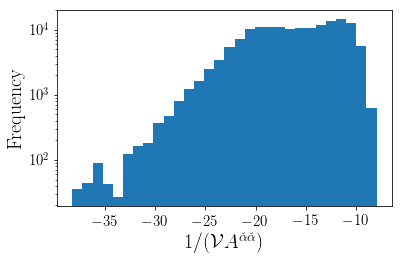

In [32]:
import pandas as pandas
from collections import Counter
import matplotlib
from matplotlib import pyplot
pyplot.rc('text', usetex=True)
pyplot.rc('font', family='serif')
pyplot.tick_params(labelsize=15)
pyplot.gcf().subplots_adjust(bottom=0.20)
pyplot.hist(edat,color = 'C0',log = True,bins = 30)
pyplot.xlabel(r'$1/(\mathcal{V}A^{\check{\alpha}\check{\alpha}})$',fontsize = 20)
pyplot.ylabel(r'Frequency',fontsize = 20)
pyplot.show()

In [39]:
#make the error for the estimation plot that jim suggested:
edat2 =  [np.log10((1/np.abs(data2['V'][ii]/data2['Ainfother'][ii]))) for ii in range(len(data2))] 

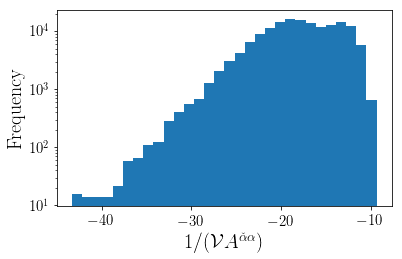

In [34]:
import pandas as pandas
from collections import Counter
import matplotlib
from matplotlib import pyplot
pyplot.rc('text', usetex=True)
pyplot.rc('font', family='serif')
pyplot.tick_params(labelsize=15)
pyplot.gcf().subplots_adjust(bottom=0.20)
pyplot.hist(edat2,color = 'C0',log = True,bins = 30)
pyplot.xlabel(r'$1/(\mathcal{V}X^{\check{\alpha}\alpha})$',fontsize = 20)
pyplot.ylabel(r'Frequency',fontsize = 20)
pyplot.show()

In [35]:
max(edat2)

-9.32588347299921

In [40]:
edat3 = edat + edat2

In [44]:
import pandas as pandas
from collections import Counter
import matplotlib
from matplotlib import pyplot
pyplot.rc('text', usetex=True)
pyplot.rc('font', family='serif')
pyplot.tick_params(labelsize=15)
pyplot.gcf().subplots_adjust(bottom=0.20)
pyplot.hist(edat3,color = 'C0',log = True,bins = 30)
pyplot.xlabel(r'$1/(\mathcal{V}x^{\alpha\beta})$',fontsize = 20)
pyplot.ylabel(r'Number',fontsize = 20)
#pyplot.show()
pyplot.savefig('/Users/cody/Dropbox/axionmixing/Draft/plots/volvscurves.pdf')

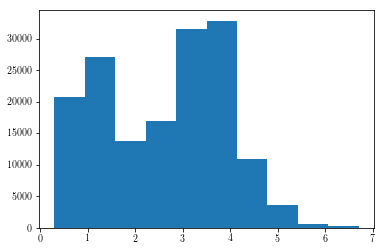

In [36]:
selfvols =  [np.log10((np.abs(data2['Ainfinf'][ii]))*np.abs(data2['Vinf'][ii])*np.abs(data2['Vinf'][ii])) for ii in range(len(data2))]
pyplot.hist(selfvols)
pyplot.show()




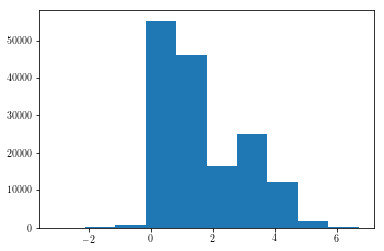

In [29]:
import matplotlib
from matplotlib import pyplot
ratiovols =  [np.log10((np.abs(data2['Ainfinf'][ii]))*np.abs(data2['Vinf'][ii])*np.abs(data2['Vinf'][ii])/((np.abs(data2['Ainfother'][ii]))*np.abs(data2['Vinf'][ii])*np.abs(data2['Vo'][ii]))) for ii in range(len(data2))]
pyplot.hist(ratiovols)
pyplot.show()

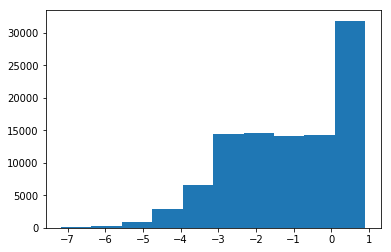

In [182]:
#now we should think about the divisor volumes a bit. 
import matplotlib
from matplotlib import pyplot
aiiovertaui =  [np.log10((np.abs(data2['Ainfinf'][ii]))*np.abs(data2['Vinf'][ii])) for ii in range(len(data2))]
pyplot.hist(aiiovertaui)
pyplot.show()

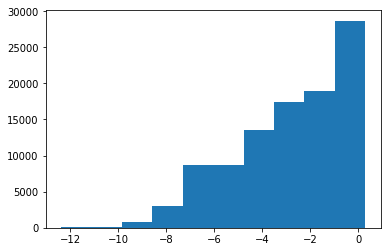

In [179]:
#now we should think about the divisor volumes a bit. 
import matplotlib
from matplotlib import pyplot
aioovertauo =  [np.log10((np.abs(data2['Ainfother'][ii]))*np.abs(data2['Vinf'][ii])) for ii in range(len(data2))]
pyplot.hist(aioovertauo)
pyplot.show()

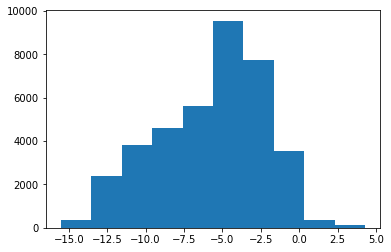

In [105]:
#let's look at some gauge group specific stuff. there are 9 possible gauge groups. let's start with gauge group 1,
#which is E8
#first look at how much E8 reheats into other stuff:
import matplotlib
from matplotlib import pyplot
E8out = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 1]
pyplot.hist(E8out)
pyplot.show()

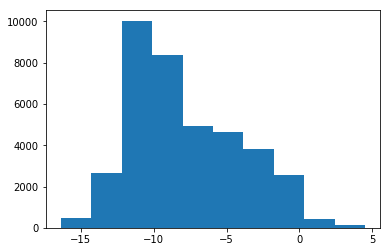

In [106]:
#now look at how much other stuff into E8
E8in = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Go'][ii] == 1]
pyplot.hist(E8in)
pyplot.show()

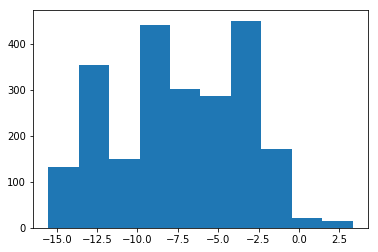

In [107]:
#E7
E7out = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 2]
pyplot.hist(E7out)
pyplot.show()

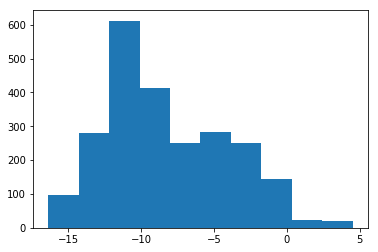

In [108]:
#now look at how much other stuff into E7
E7in = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Go'][ii] == 2]
pyplot.hist(E7in)
pyplot.show()

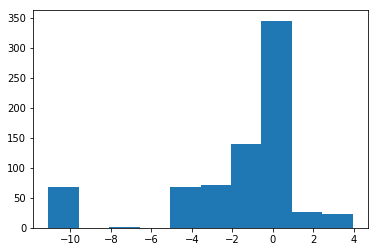

In [109]:
#E6
E6out = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 3]
pyplot.hist(E6out)
pyplot.show()

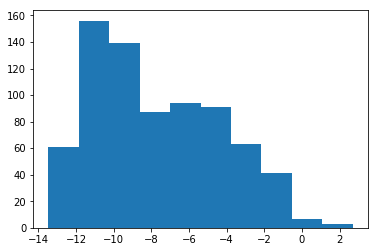

In [110]:
E6in = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Go'][ii] == 3]
pyplot.hist(E6in)
pyplot.show()

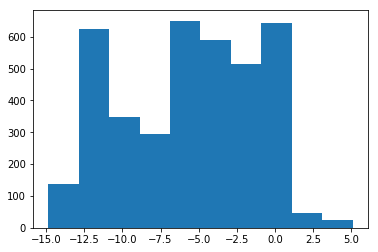

In [111]:
#F4
F4out = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 4]
pyplot.hist(F4out)
pyplot.show()

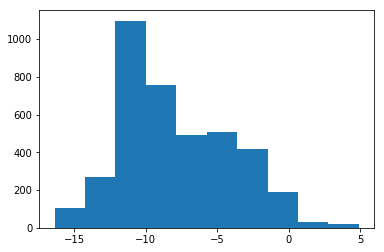

In [112]:
F4in = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Go'][ii] == 4]
pyplot.hist(F4in)
pyplot.show()

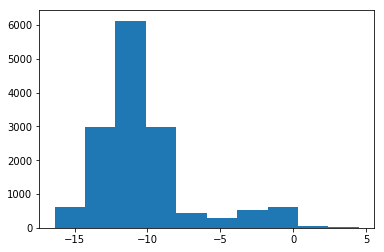

In [114]:
#G2
G2out = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 5]
pyplot.hist(G2out)
pyplot.show()

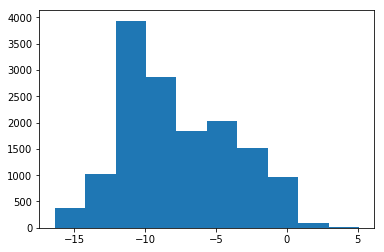

In [116]:
G2in = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Go'][ii] == 5]
pyplot.hist(G2in)
pyplot.show()

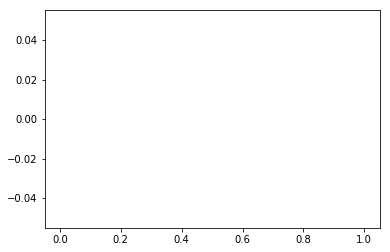

In [117]:
#SO8
SO8out = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 6]
pyplot.hist(SO8out)
pyplot.show()

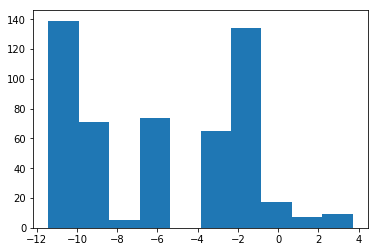

In [119]:
#SO7
SO7out = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 7]
pyplot.hist(SO7out)
pyplot.show()

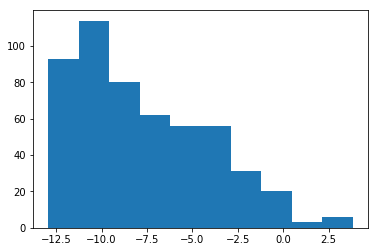

In [120]:
SO7in = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Go'][ii] == 7]
pyplot.hist(SO7in)
pyplot.show()

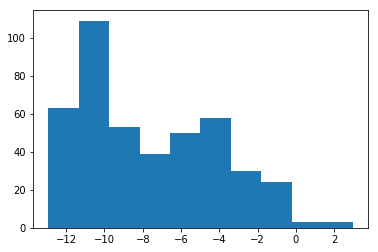

In [121]:
S3in = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Go'][ii] == 8]
pyplot.hist(S3in)
pyplot.show()

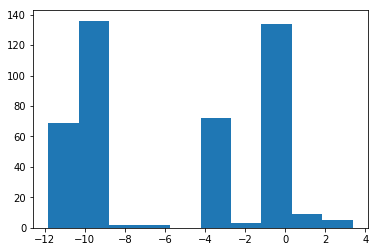

In [122]:
S3out = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 8]
pyplot.hist(S3out)
pyplot.show()

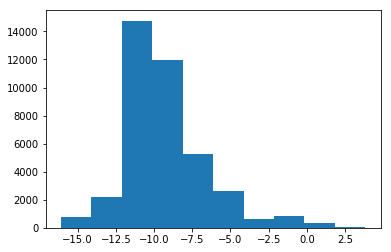

In [123]:
S2out = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 9]
pyplot.hist(S2out)
pyplot.show()

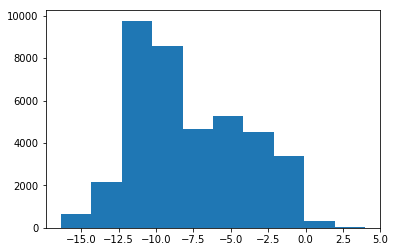

In [124]:
S2in = [dataset['logCrat'][ii] for ii in range(len(dataset)) if dataset['Go'][ii] == 9]
pyplot.hist(S2in)
pyplot.show()

In [45]:
#all
logCrat = [(dataset['logCrat'][ii]) for ii in range(len(dataset))]


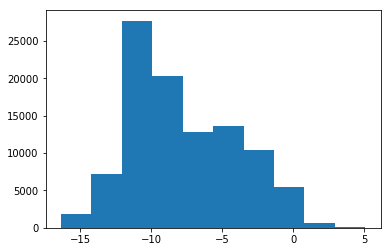

In [48]:
import matplotlib
from matplotlib import pyplot
pyplot.hist(logCrat)
pyplot.show()

In [144]:
print len(logCrat)
print len(randomdats)

100000
1000


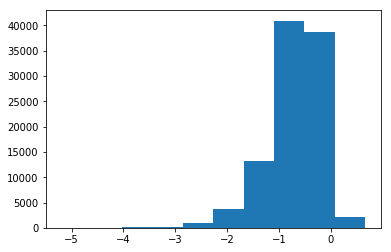

In [145]:
import numpy as np
def rw(): # pos def metric
            A = [[np.random.normal(loc = 0,scale = 1/np.sqrt(10)) for mm in range(10)] for pp in range(10)]
            A = np.array(A)
            #A = [[np.random.normal(size=(self.nmod,self.nmod), scale = self.sigma)]]
            #A = np.array([[self.sigma*mpm.sqrt(mpf(2))*mpm.erfinv(mpf(2)*mpm.rand()-mpf(1)) for i in range(self.nmod)] for j in range(self.nmod)])
            #mpm addition
            #A = np.array([[mpm.npdf(0,self.sigma) for i in range(self.nmod)] for j in range(self.nmod)])
            #print "metric test\n", A
            return np.dot(A,A.transpose())
def rv():
            A = [np.random.normal(loc = 0,scale = 1/np.sqrt(10)) for mm in range(10)]
            return np.array(A)
randomdats = []
for i in range(100000):
    met = rw()
    rvi = rv()
    rvo = rv()
    randomdats.append(np.log10(np.abs(np.dot(rvo,np.dot(rvi,met)))))
pyplot.hist(randomdats)
pyplot.show()

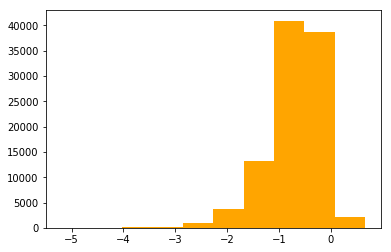

In [146]:
pyplot.hist(randomdats, color = "orange")
pyplot.show()

In [115]:


S2outgroups = [dataset['Go'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 9 
               and dataset['logCrat'][ii] > -1]
#pyplot.hist(S2outgroups)
#x = np.random.randn(10000)
#counts,bin_edges = np.histogram(x,20)
counts,bin_edges = np.histogram(S2outgroups,9)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
#err = np.random.rand(bin_centres.size)*100
#pyplot.errorbar(bin_centres, counts, yerr=err, fmt='o')
pyplot.errorbar(bin_centres, counts, fmt='o')

#pp.show()

pyplot.show()


TypeError: cannot perform reduce with flexible type

In [148]:
import pandas as pandas
from collections import Counter
pyplot.rc('text', usetex=True)
pyplot.rc('font', family='serif')
pyplot.tick_params(labelsize=15)
pyplot.gcf().subplots_adjust(bottom=0.25)
pyplot.gcf().subplots_adjust(left=0.25)
pyplot.xlabel(r'Gauge Group',fontsize = 20)
pyplot.ylabel(r'Frequency',fontsize = 20)


#df = pandas.DataFrame.from_dict(letter_counts, orient='index')
pandas.Series(Counter(S2outgroups)).plot(kind='bar')
locs, labels = pyplot.xticks()
pyplot.xticks(locs, ['$E_6$','$E_7$','$E_8$','$F_4$','$G_2$','$SU(2)$','$SU(3)$','$SO(7)$'])
#df.plot(kind='bar')
#pyplot.show()

([<matplotlib.axis.XTick at 0x1251110d0>,
 <a list of 8 Text xticklabel objects>)

In [149]:
pyplot.savefig('/Users/cody/Dropbox/axionmixing/Draft/gaugegroups.pdf')

In [135]:
counts
S2outgroups[17716] = 'E8'
print S2outgroups.index('1')
print len(S2outgroups)

ValueError: '1' is not in list

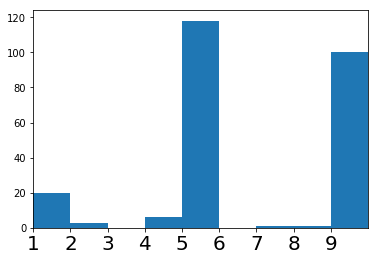

In [115]:
#what does s2 reheat into?
import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    
import matplotlib.pyplot as plt
bins = range(1,11)
plt.hist(S2outgroups, bins=bins)
bins_labels(bins, fontsize=20)
plt.show()

S2outgroups

In [34]:
print S2outgroups

NameError: name 'S2outgroups' is not defined

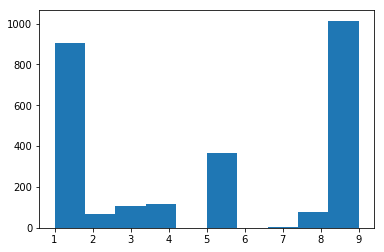

In [163]:
#what does s3 reheat into?
S3outgroups = [dataset['Go'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 8 
               and dataset['logCrat'][ii] > -1]
pyplot.hist(S3outgroups)
pyplot.show()


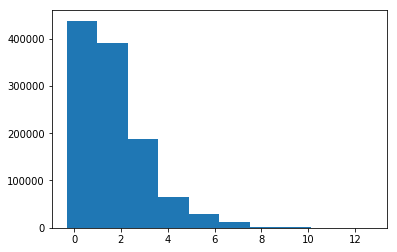

In [164]:
#volumes of su2 cycles:
S2taus = [dataset['logVinf'][ii] for ii in range(len(dataset)) if dataset['Ginf'][ii] == 9]
#pyplot.hist(S2outgroups)
#x = np.random.randn(10000)
#counts,bin_edges = np.histogram(x,20)
pyplot.hist(S2taus)
pyplot.show()

In [41]:
#make the single geometriy plit
onedat = [-0.971392, -10.8897, -10.0421, 0., -6.85554, -11.3669, -8.1478, 
-10.8897, -10.6399, -9.82759, -8.93059, -10.7068, -9.88804, -5.82429, 
-0.368086, -9.42553, -4.93968, -7.09976, -8.52052, -7.30239, 
-10.2365, -2.61822, -10.8897, -8.98126, -10.145, -1.64038, -10.6399, -0.826784, -2.84291, -10.9567, -9.01909, -10.1072, -9.48186, \
-9.57282, -4.48091, -1.7823, -10.7068, -8.91659, -9.91777, -9.65445, 
-1.07686, -5.22656, -5.60034, -10.5607, -3.0678, -4.72534, -10.6399, 
-10.8106, -5.8751, -10.0244, -2.48639, -10.6399, 0.0366211, -9.94967, 
-10.7068, -3.75377, -9.4815, -7.93207, -4.86188, -9.18502, -8.68145, 
-4.63676, -8.44292, -10.097, -10.3756, -8.49064, -6.57745, -1.746, 
0.87925]

In [50]:
import pandas as pandas
from collections import Counter
pyplot.rc('text', usetex=True)
pyplot.rc('font', family='serif')
pyplot.tick_params(labelsize=15)
pyplot.gcf().subplots_adjust(bottom=0.20)
pyplot.hist(onedat,color = 'C0')
pyplot.xlabel(r'$R^{\alpha}_{\check{\alpha}}$',fontsize = 20)
pyplot.ylabel(r'Frequency',fontsize = 20)

Text(0,0.5,'Frequency')

In [51]:
#pyplot.show()
pyplot.savefig('/Users/cody/Dropbox/axionmixing/Draft/singlegeom.pdf')

In [38]:
onedat

[0.106809,
 1.28901e-11,
 9.07686e-11,
 1.0,
 1.39463e-07,
 4.29674e-12,
 7.11539e-09,
 1.28902e-11,
 2.29159e-11,
 1.48733e-10,
 1.1733e-09,
 1.96422e-11,
 1.29408e-10,
 1.49869e-06,
 0.428464,
 3.75378e-10,
 1.149e-05,
 7.94774e-08,
 3.01633e-09,
 4.9844e-08,
 5.80059e-11,
 0.00240868,
 1.28902e-11,
 1.04411e-09,
 7.16123e-11,
 0.0228886,
 2.29159e-11,
 0.14901,
 0.0014358,
 1.10488e-11,
 9.57e-10,
 7.81225e-11,
 3.29718e-10,
 2.67409e-10,
 3.30436e-05,
 0.0165081,
 1.96422e-11,
 1.21174e-09,
 1.20846e-10,
 2.21589e-10,
 0.0837805,
 5.93524e-06,
 2.50993e-06,
 2.74991e-11,
 0.000855465,
 1.88216e-05,
 2.29159e-11,
 1.54683e-11,
 1.33321e-06,
 9.45282e-11,
 0.00326295,
 2.29159e-11,
 1.08798,
 1.12288e-10,
 1.96422e-11,
 0.00017629,
 3.29989e-10,
 1.16931e-08,
 1.37442e-05,
 6.53104e-10,
 2.08233e-09,
 2.30803e-05,
 3.60644e-09,
 7.99854e-11,
 4.2108e-11,
 3.23117e-09,
 2.64577e-07,
 0.0179474,
 7.57268]

In [76]:
#heat map for all of the gauge group
outgroups = [[0 for i in range(8)] for j in range(8)]
for ii in range(len(dataset)):
    if  dataset['logCrat'][ii] >= -1 and dataset['Ginf'][ii] != '1' and dataset['Go'][ii] != '1':
        outgroups[int(group_map[dataset['Ginf'][ii]]) - 1][int(group_map[dataset['Go'][ii]]) - 1] += 1
        
#outgroups = [[dataset['Ginf'][ii], dataset['Go'][ii],dataset['logCrat'][ii] ] for ii in range(len(dataset)) if 
              #dataset['logCrat'][ii] > -1]
#pyplot.hist(S2outgroups)
#x = np.random.randn(10000)
#counts,bin_edges = np.histogram(x,20)
#counts,bin_edges = np.histogram(S2outgroups,9)
#bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
#err = np.random.rand(bin_centres.size)*100
#pyplot.errorbar(bin_centres, counts, yerr=err, fmt='o')
#pyplot.errorbar(bin_centres, counts, fmt='o')

#pp.show()

#pyplot.show()


In [ ]:
uniform_data = np.random.rand(10, 12)

In [77]:
outgroups

[[33410, 715, 168, 1327, 399, 32, 41, 1118],
 [578, 397, 10, 108, 172, 104, 12, 100],
 [2424, 49, 76, 111, 32, 8, 34, 51],
 [3501, 115, 44, 646, 450, 13, 54, 180],
 [1530, 187, 5, 515, 225, 11, 11, 4473],
 [442, 181, 2, 50, 32, 37, 8, 72],
 [336, 32, 92, 87, 20, 4, 59, 34],
 [641, 77, 20, 142, 11968, 54, 23, 8443]]

In [75]:
group_map = {"E8": 1, "E7": 2, "E6": 3, "F4": 4, "G2": 5, "SO7": 6, "S3": 7, "S2": 8 }

In [74]:
group_map

{'E6': 3,
 'E7': 2,
 'E8': 1,
 'F4': 4,
 'G2': 5,
 'S2': 9,
 'S3': 8,
 'SO7': 7,
 'SO8': 6}